# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Ahmad Hanif Adisetya
- **Email:** m010d4ky1890@bangkit.academy
- **ID Dicoding:** ahanif03

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Pola turun dan naik tingkat konsentrasi polutan dalam jangka waktu perjam dan perbulan akan seperti apa?
- Pertanyaan 2: Adakah pengaruh hujan terhadap polutan SO2 dan NO2 di suatu stasiun?

## Import Semua Packages/Library yang Digunakan

In [16]:
import pandas as pd
from matplotlib import pyplot as plt
import os

## Data Wrangling

### Gathering Data

In [17]:
# Inisialisasi list kosong untuk menampung dataframe
dataframes = []

# Iterasi dataset kualitas udara
for filename in os.listdir('data/'):
  filepath = os.path.join('data/', filename)
  df = pd.read_csv(filepath)
  dataframes.append(df)

# Menggabungkan data yang ada ke satu dataframe
df_air_quality = pd.concat(dataframes, ignore_index=True)

df_air_quality.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


Pada bagian ini, akan dikumpulkan data yang nantinya akan digunakan. Pada proyek kali ini, digunakan dataset Air Quality. Terdapat 12 dataset dalam file csv. Masing-masing csv memuat data kualitas udara dari berbagai macam kota di (asumsi saya) Republik Cina. Saat dicek manual, data-data memiliki kolom yang sama. Oleh karena itu, data-data tersebut akan disatukan ke dalam satu dataframe yang sama. Pada kode di atas, saya melakukan iterasi terhadap file-file csv yang terdapat di direktori `data/`. Kemudian akan saya baca file tersebut dan dimasukkan ke dataframe. Setelah selesai melakukan iterasi, saya gabungkan semuanya ke dalam satu dataframe yaitu `df_air_quality` 

### Assessing Data

In [18]:
# Cek missing value, duplicate data, dan outlier

# Missing Value
print('Missing Values')
print(df_air_quality.isnull().sum())
print()

# Duplicated Data
print('Duplicated data')
print(df_air_quality.duplicated().sum())
print()

# Outliers
print('Outlier')
outliers_col = []
rubs = {}
rlbs = {}
for col in df_air_quality.columns:
  if df_air_quality[col].dtype == 'float64':
    q1 = df_air_quality[col].quantile(0.25)
    q3 = df_air_quality[col].quantile(0.75)
    iqr = q3 - q1
    rub = q3 + 1.5 * iqr
    rlb = q1 - 1.5 * iqr
    outliers = len(df_air_quality[df_air_quality[col] > rub]) + len(df_air_quality[df_air_quality[col] < rlb])
    percentage = (outliers/df_air_quality.shape[0])*100

    if percentage > 4:
      outliers_col.append(col)
      rubs[col] = rub
      rlbs[col] = rlb
      print(f'Jumlah outlier pada atribut {col} adalah {outliers}, {percentage}% data')

Missing Values
No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64

Duplicated data
0

Outlier
Jumlah outlier pada atribut PM2.5 adalah 19142, 4.549300327021067% data
Jumlah outlier pada atribut SO2 adalah 35566, 8.452638983953152% data
Jumlah outlier pada atribut CO adalah 28054, 6.667332116510762% data
Jumlah outlier pada atribut WSPM adalah 23079, 5.484970339949806% data


Pada tahap assessing data, saya memeriksa 3 aspek dalam data. Aspek yang dicek yaitu missing value, data duplikat, dan outlier. Dalam pengecekan missing value, saya melihat apakah terdapat nilai yang kosong atau null pada suatu kolom dalam masing-masing row dataset. Pada  kode di atas, terlihat bahwa terdapat banyak sekali missing value. Missing value terbanyak terdapat pada kolom `CO` sebanyak 20701 yang kemudian disusul oleh `O3` dan `NO2`. <br><br>
Kemudian saya melakukan pengecekan pada data duplikat yang ada pada dataframe. Bisa dilihat, bahwa tidak ada data duplikat pada data yang dimiliki. Oleh karena itu, pada step cleaning data tidak perlu dilakukan apa-apa. <br><br>
Terakhir, dilakukan pengecekan outlier. Saya memanfaatkan ambang batas atas dan bawah yang bisa diperoleh dengan menghitung IQR. Setelah dihitung ambangnya, maka akan dihitung seberapa banyak data yang terdapat di atas ambang atas dan di bawah ambang bawah. Dapat dilihat bahwa kolom `SO2` memiliki outlier tertinggi dengan jumlah sekitar 8.4% dari data. Kemudian disusul oleh `CO` dan `WSPM` yang memiliki 6.6 dan 5.4 persentase outlier masing-masingnya. Selain ketiga atribut tersebut, masih ada atribut-atribut lainnya yang memiliki outlier dengan jumlah persentase 4% ke bawah. Namun, saya tidak akan melakukan apa-apa terhadap data tersebut karena saya merasa masih insignifikan.

### Cleaning Data

Missing Values
No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

Outliers
Jumlah outlier pada atribut PM10 adalah 13500, 3.532477863138724% data


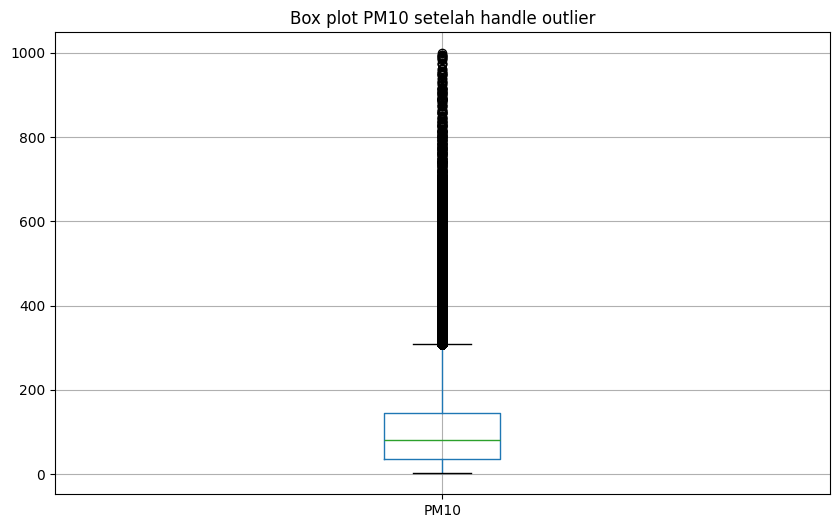

Jumlah outlier pada atribut SO2 adalah 33436, 8.749031839400473% data


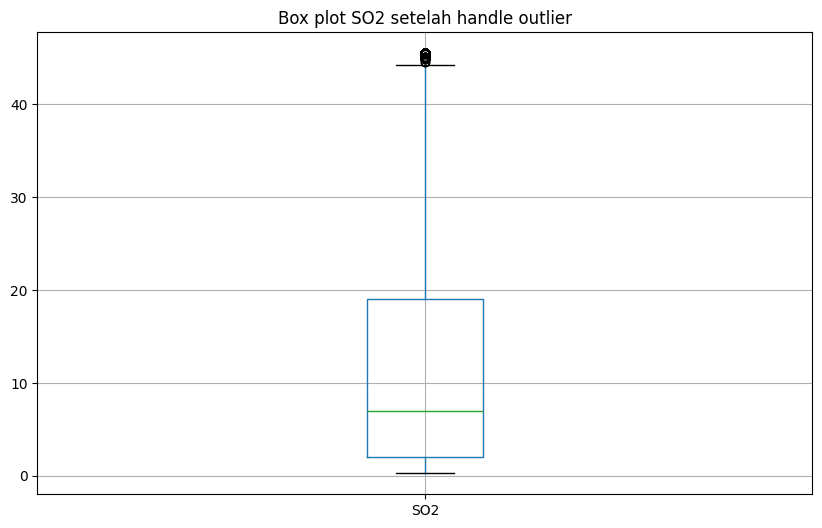

Jumlah outlier pada atribut NO2 adalah 6528, 1.7081492955977475% data


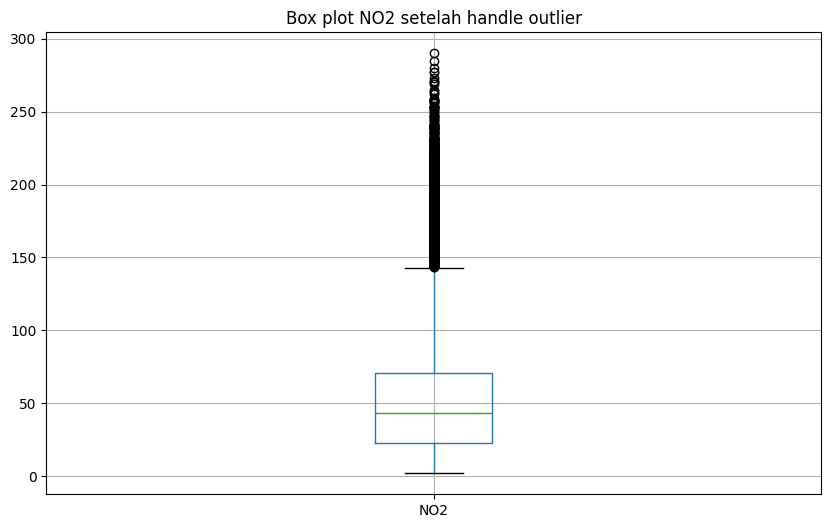

Jumlah outlier pada atribut O3 adalah 15299, 4.003213246530322% data


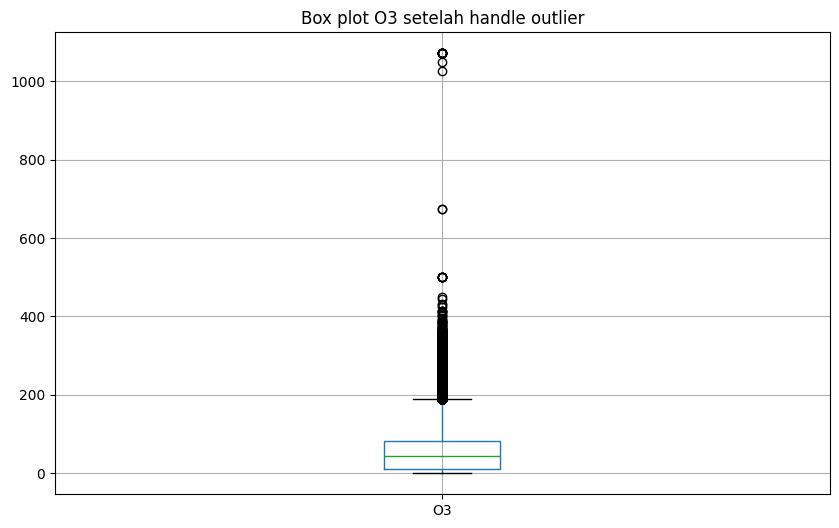

Jumlah outlier pada atribut RAIN adalah 15119, 3.956113541688472% data


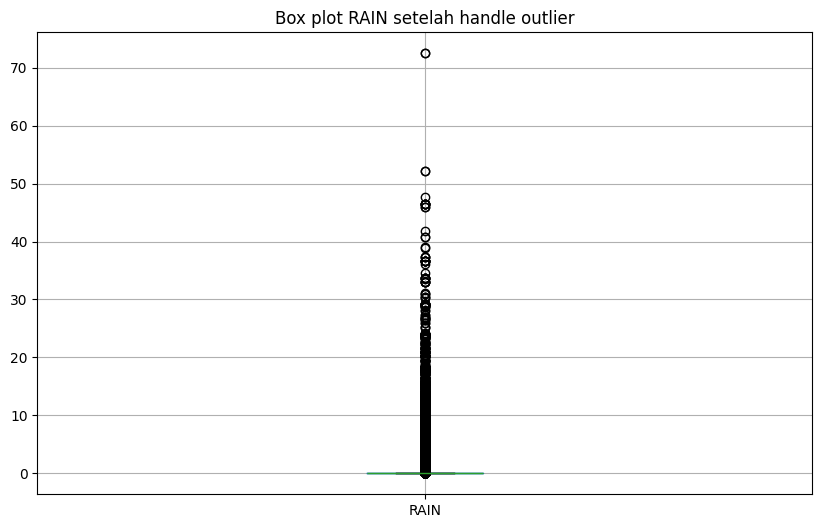

In [19]:
# Menghapus missing value
df_air_quality.dropna(axis=0, inplace=True)
print('Missing Values')
print(df_air_quality.isnull().sum())

# Menghandle outlier
for col in outliers_col:
  rub = rubs[col]
  rlb = rlbs[col]

  more_than = df_air_quality[col] > rub
  lower_than = df_air_quality[col] < rlb

  df_air_quality.loc[more_than, col] = rub  
  df_air_quality.loc[lower_than, col] = rlb

# Cek terkait outlier
print('\nOutliers')
for col in df_air_quality.columns:
  if df_air_quality[col].dtype == 'float64':
    q1 = df_air_quality[col].quantile(0.25)
    q3 = df_air_quality[col].quantile(0.75)
    iqr = q3 - q1
    rub = q3 + 1.5 * iqr
    rlb = q1 - 1.5 * iqr
    outliers = len(df_air_quality[df_air_quality[col] > rub]) + len(df_air_quality[df_air_quality[col] < rlb])

    if outliers > 0:
      print(f'Jumlah outlier pada atribut {col} adalah {outliers}, {(outliers/df_air_quality.shape[0])*100}% data')
      plt.figure(figsize=(10, 6))
      df_air_quality.boxplot([col])
      plt.title(f'Box plot {col} setelah handle outlier')
      plt.show()

Pada tahap ini, telah dilakukan cleaning data terhadap dataframe. Langkah pertama yang dilakukan adalah menghandle missing value. Terdapat berbagai macam opsi, namun langkah yang saya ambil adalah dengan melakukan drop atau menghilangkan row data yang memiliki outlier. Keputusan saya tersebut didasari karena banyaknya jumlah data sehingga hilangnya data tersebut akan tidak terlalu signifikan, serta jika saya melakukan imputasi dengan nilai mean ataupun median bisa merubah detail atau maksud dari data.<br><br>
Kemudian untuk outlier, di sini saya coba untuk melakukan imputasi terhadap kolom yang memiliki outlier. Pada kolom yang memiliki outlier, saya akan mengimputasi nilai di atas ambang atas menjadi nilai ambang atas, dan nilai di bawah ambang bawah mengjadi nilai ambang bawah. Harapannya dengan hal tersebut, outlier pada data akan semakin mengurang namun detail dari tidak akan terlalu hilang. Setelah dilakukan penerapan tersebut, saya cek kembali outliers yang ada. Diperoleh bahwa masih ada beberapa outlier.<br><br>
Saya memutuskan untuk tidak melakukan apa-apa lagi terhadap outlier. Hal tersebut dikarenakan saya tidak ingin kehilangan detail dari data. Sebagai contoh untuk atribut `Rain`. Jika saya lakukan imputasi ataupun drop, nantinya seluruh data akan bernilai 0. Hal tersebut mengakibatkan saya kehilangan data pada saat hari hujan. Selain kehilangan data, setelah bereksplorasi di internet saya menemukan bahwa outliers tersebut masih berada pada rentang data yang memang mungkin terjadi di dunia nyata

## Exploratory Data Analysis (EDA)

In [20]:
df_air_quality.info()

<class 'pandas.core.frame.DataFrame'>
Index: 382168 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       382168 non-null  int64  
 1   year     382168 non-null  int64  
 2   month    382168 non-null  int64  
 3   day      382168 non-null  int64  
 4   hour     382168 non-null  int64  
 5   PM2.5    382168 non-null  float64
 6   PM10     382168 non-null  float64
 7   SO2      382168 non-null  float64
 8   NO2      382168 non-null  float64
 9   CO       382168 non-null  float64
 10  O3       382168 non-null  float64
 11  TEMP     382168 non-null  float64
 12  PRES     382168 non-null  float64
 13  DEWP     382168 non-null  float64
 14  RAIN     382168 non-null  float64
 15  wd       382168 non-null  object 
 16  WSPM     382168 non-null  float64
 17  station  382168 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 55.4+ MB


In [21]:
df_air_quality.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000
mean,17955.931070,2014.714905,6.475087,15.711308,11.575184,75.837951,104.573837,13.389858,50.570068,1127.193255,57.376676,13.518694,1010.813471,2.417195,0.065030,1.677220
std,10001.787087,1.160266,3.449317,8.803064,6.933552,68.163150,91.379446,13.961212,35.062086,821.176101,56.709013,11.425355,10.452381,13.798402,0.823901,1.058502
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-19.900000,982.400000,-36.000000,0.000000,0.000000
25%,9610.000000,2014.000000,3.000000,8.000000,6.000000,20.000000,36.000000,2.000000,23.000000,500.000000,10.495800,3.100000,1002.400000,-9.000000,0.000000,0.900000
50%,18103.000000,2015.000000,6.000000,16.000000,12.000000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.400000,1010.400000,3.000000,0.000000,1.400000
75%,26515.000000,2016.000000,9.000000,23.000000,18.000000,111.000000,145.000000,19.000000,71.000000,1500.000000,82.000000,23.200000,1019.000000,15.100000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,247.500000,999.000000,45.500000,290.000000,3000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,4.150000


In [22]:
numeric_cols = df_air_quality.select_dtypes(include=['number']).drop(columns=['wd', 'station', 'no'], errors='ignore')
numeric_cols.corr()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
No,1.000000,0.968620,0.056211,0.016624,-0.003728,-0.045809,-0.049872,-0.223949,-0.042262,-0.012682,-0.048242,-0.133544,0.193543,-0.110269,0.005496,0.064366
year,0.968620,1.000000,-0.192834,-0.008714,-0.003916,-0.047377,-0.044236,-0.163851,-0.052299,-0.022406,-0.022092,-0.167188,0.194616,-0.178617,0.001162,0.102090
month,0.056211,-0.192834,1.000000,0.017476,-0.001570,0.008950,-0.021498,-0.228006,0.041530,0.040355,-0.101052,0.146401,-0.022140,0.283626,0.017509,-0.155902
day,0.016624,-0.008714,0.017476,1.000000,-0.002153,0.001674,0.024428,-0.005862,0.013503,-0.015400,-0.001101,0.012243,0.022391,0.024001,-0.002783,-0.010259
hour,-0.003728,-0.003916,-0.001570,-0.002153,1.000000,0.011136,0.051421,0.040524,-0.002536,-0.027443,0.281204,0.139155,-0.038386,-0.012506,0.012610,0.149768
PM2.5,-0.045809,-0.047377,0.008950,0.001674,0.011136,1.000000,0.852233,0.512616,0.667918,0.806668,-0.141707,-0.105761,-0.006971,0.151435,-0.014879,-0.305133
PM10,-0.049872,-0.044236,-0.021498,0.024428,0.051421,0.852233,1.000000,0.470490,0.653577,0.686765,-0.114345,-0.094793,-0.021942,0.072706,-0.026885,-0.206598
SO2,-0.223949,-0.163851,-0.228006,-0.005862,0.040524,0.512616,0.470490,1.000000,0.524567,0.607361,-0.167523,-0.357512,0.253183,-0.305415,-0.049659,-0.111397
NO2,-0.042262,-0.052299,0.041530,0.013503,-0.002536,0.667918,0.653577,0.524567,1.000000,0.731230,-0.476812,-0.276387,0.172287,-0.028276,-0.043946,-0.418549
CO,-0.012682,-0.022406,0.040355,-0.015400,-0.027443,0.806668,0.686765,0.607361,0.731230,1.000000,-0.338912,-0.313689,0.174485,-0.015558,-0.010080,-0.363301


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren polutan dalam jangka waktu jam dan bulan

Bagaimana tren polutan dalam jangka waktu jam dan bulan<br><br>

Pada kasus ini saya ingin mencoba melihat apakah perbedaan waktu berpengaruh terhadap tingkat polutan yang ada. Di sini saya akan mengambil rata-rata dari masing-masing jangka waktu untuk menilainya. Ini berarti, contoh saya akan mengambil rata-rata polutan pada jam 1 siang dari keseluruhan data. Begitu pula untuk jangka waktu bulan, saya akan mengambil rata-rata seluruh hari pada bulan tersebut. Saya juga akan menggunakan dataset yang telah diterapkan pre-processing. Hal ini karena menurut saya meskipun sudah dilakukan imputasi dan masih adanya outlier, dari pengecekan ternyata data tersebut masih representatif terhadap data awal dan juga kasus di dunia nyata.<br><br>

Berikut adalah steps yang akan dilakukan:
1. Membuat list dari atribut polutan
2. Mengelompokkan data berdasarkan jangka waktu (jam dan bulan)
3. Menghitung rata-rata saat dikelompokkan
4. Menampilkan pada line chart, beserta nilai tertinggi dan terendah dari masing-masing polutan

Di sini, saya memisahkan line chart `CO`. Hal ini dikarenakan nilai dari `CO` secara signifikan lebih besar sehingga akan membuat line chart menjadi terlalu kecil

In [23]:
# List polutan
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'O3', 'CO']

# Jangka waktu jam rata-rata, juga memisahkan 'CO'
avg_hour_pollutant = df_air_quality.groupby('hour')[pollutants].mean()
avg_hour_co = avg_hour_pollutant.pop('CO')

# Jangka waktu bulan rata-rata, juga memisahkan 'CO'
monthly_avg_pollutants = df_air_quality.groupby('month')[pollutants].mean()
monthly_avg_CO = monthly_avg_pollutants.pop('CO')  

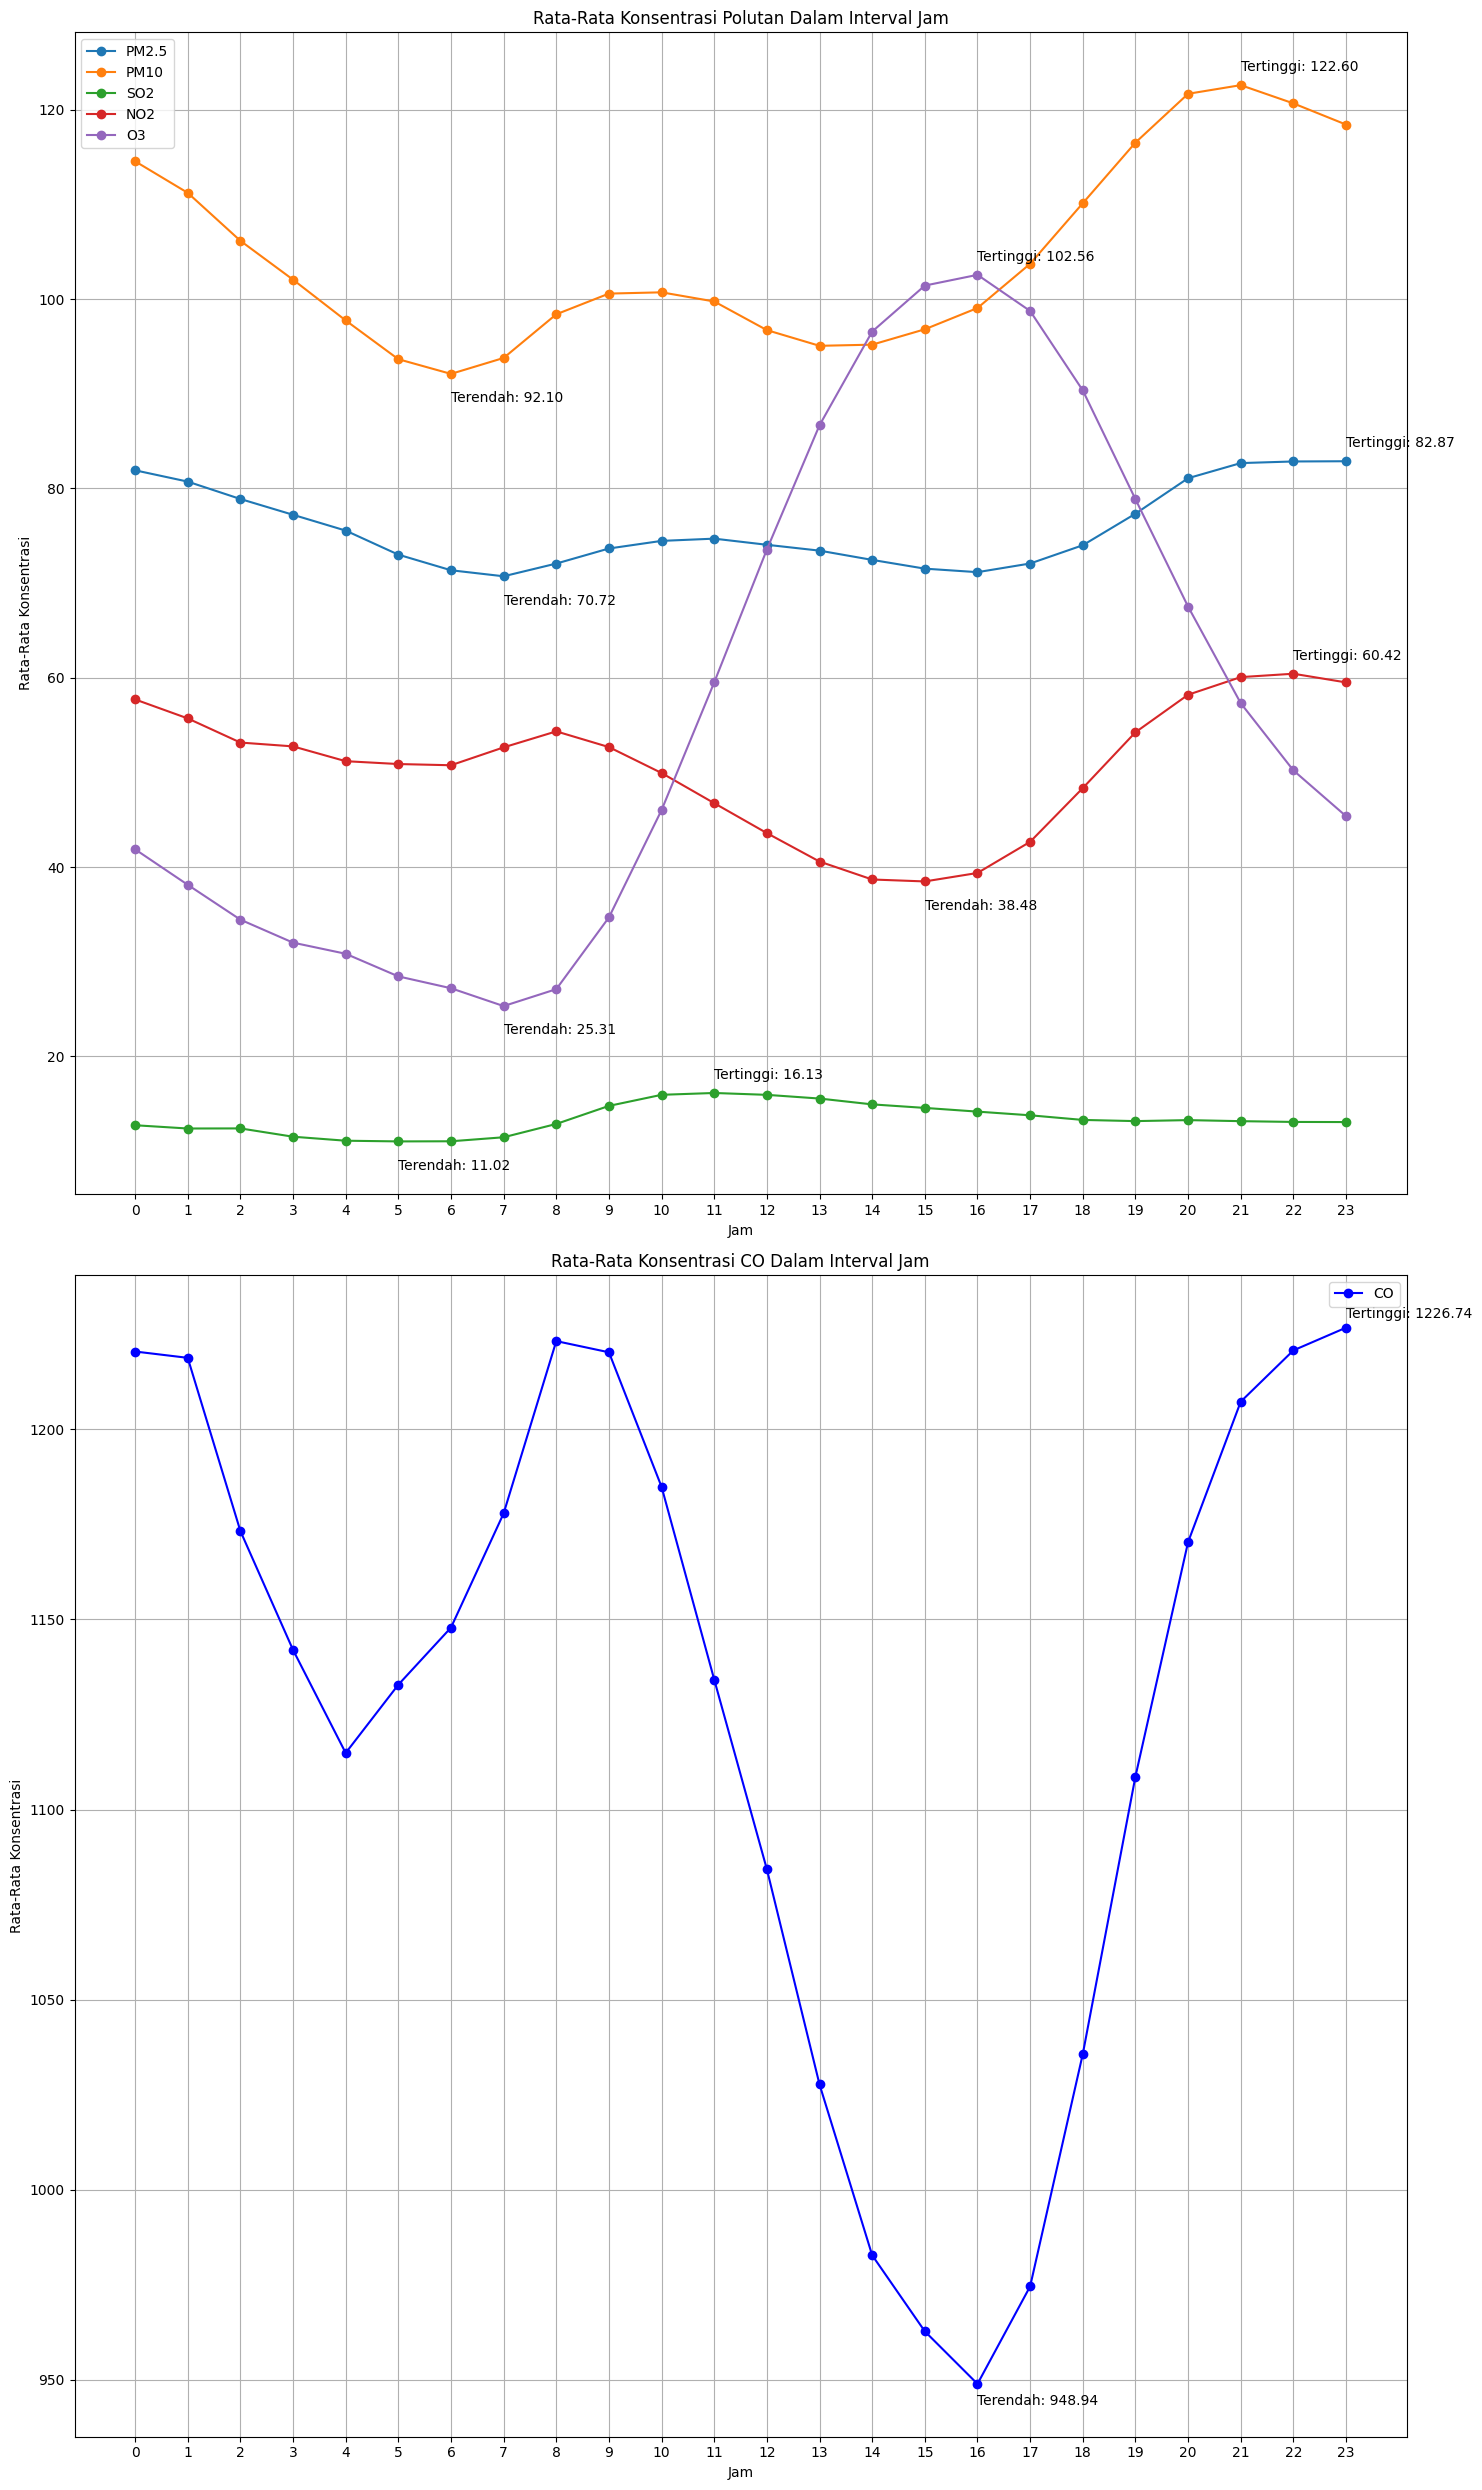

In [24]:
plt.figure(figsize=(15, 25))

# Plot polutan selain CO
plt.subplot(2, 1, 1)
for pollutant in avg_hour_pollutant.columns:
    plt.plot(avg_hour_pollutant.index, avg_hour_pollutant[pollutant], marker='o', label=pollutant)

    # Mencari titik tertinggi dan terendah polutan, lalu masukkan pada plot
    peak_value = avg_hour_pollutant[pollutant].max()
    lowest_value = avg_hour_pollutant[pollutant].min()
    peak_hour = avg_hour_pollutant[pollutant].idxmax()
    lowest_hour = avg_hour_pollutant[pollutant].idxmin()
    plt.annotate(f'Tertinggi: {peak_value:.2f}', 
                 xy=(peak_hour, peak_value), xytext=(peak_hour, peak_value+1.5), fontsize=10)
    plt.annotate(f'Terendah: {lowest_value:.2f}', 
                 xy=(lowest_hour, lowest_value), xytext=(lowest_hour, lowest_value-3), fontsize=10)

# Menambahkan judul, label, jarak tick, legend, dan grid
plt.title('Rata-Rata Konsentrasi Polutan Dalam Interval Jam')
plt.xlabel('Jam')
plt.ylabel('Rata-Rata Konsentrasi')
plt.xticks(range(0, 24))
plt.legend()
plt.grid(True)

# Plot polutan CO
plt.subplot(2, 1, 2)
plt.plot(avg_hour_co.index, avg_hour_co, marker='o', color='blue', label='CO')

# Mencari titik tertinggi dan terendah CO, lalu masukkan pada plot
peak_value = avg_hour_co.max()
lowest_value = avg_hour_co.min()
peak_hour = avg_hour_co.idxmax()
lowest_hour = avg_hour_co.idxmin()
plt.annotate(f'Tertinggi: {peak_value:.2f}', 
             xy=(peak_hour, peak_value), xytext=(peak_hour, peak_value+2.5), fontsize=10)
plt.annotate(f'Terendah: {lowest_value:.2f}', 
             xy=(lowest_hour, lowest_value), xytext=(lowest_hour, lowest_value-5.5), fontsize=10)

# Menambahkan judul, label, jarak tick, legend, dan grid
plt.title('Rata-Rata Konsentrasi CO Dalam Interval Jam')
plt.xlabel('Jam')
plt.ylabel('Rata-Rata Konsentrasi')
plt.xticks(range(0, 24))
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


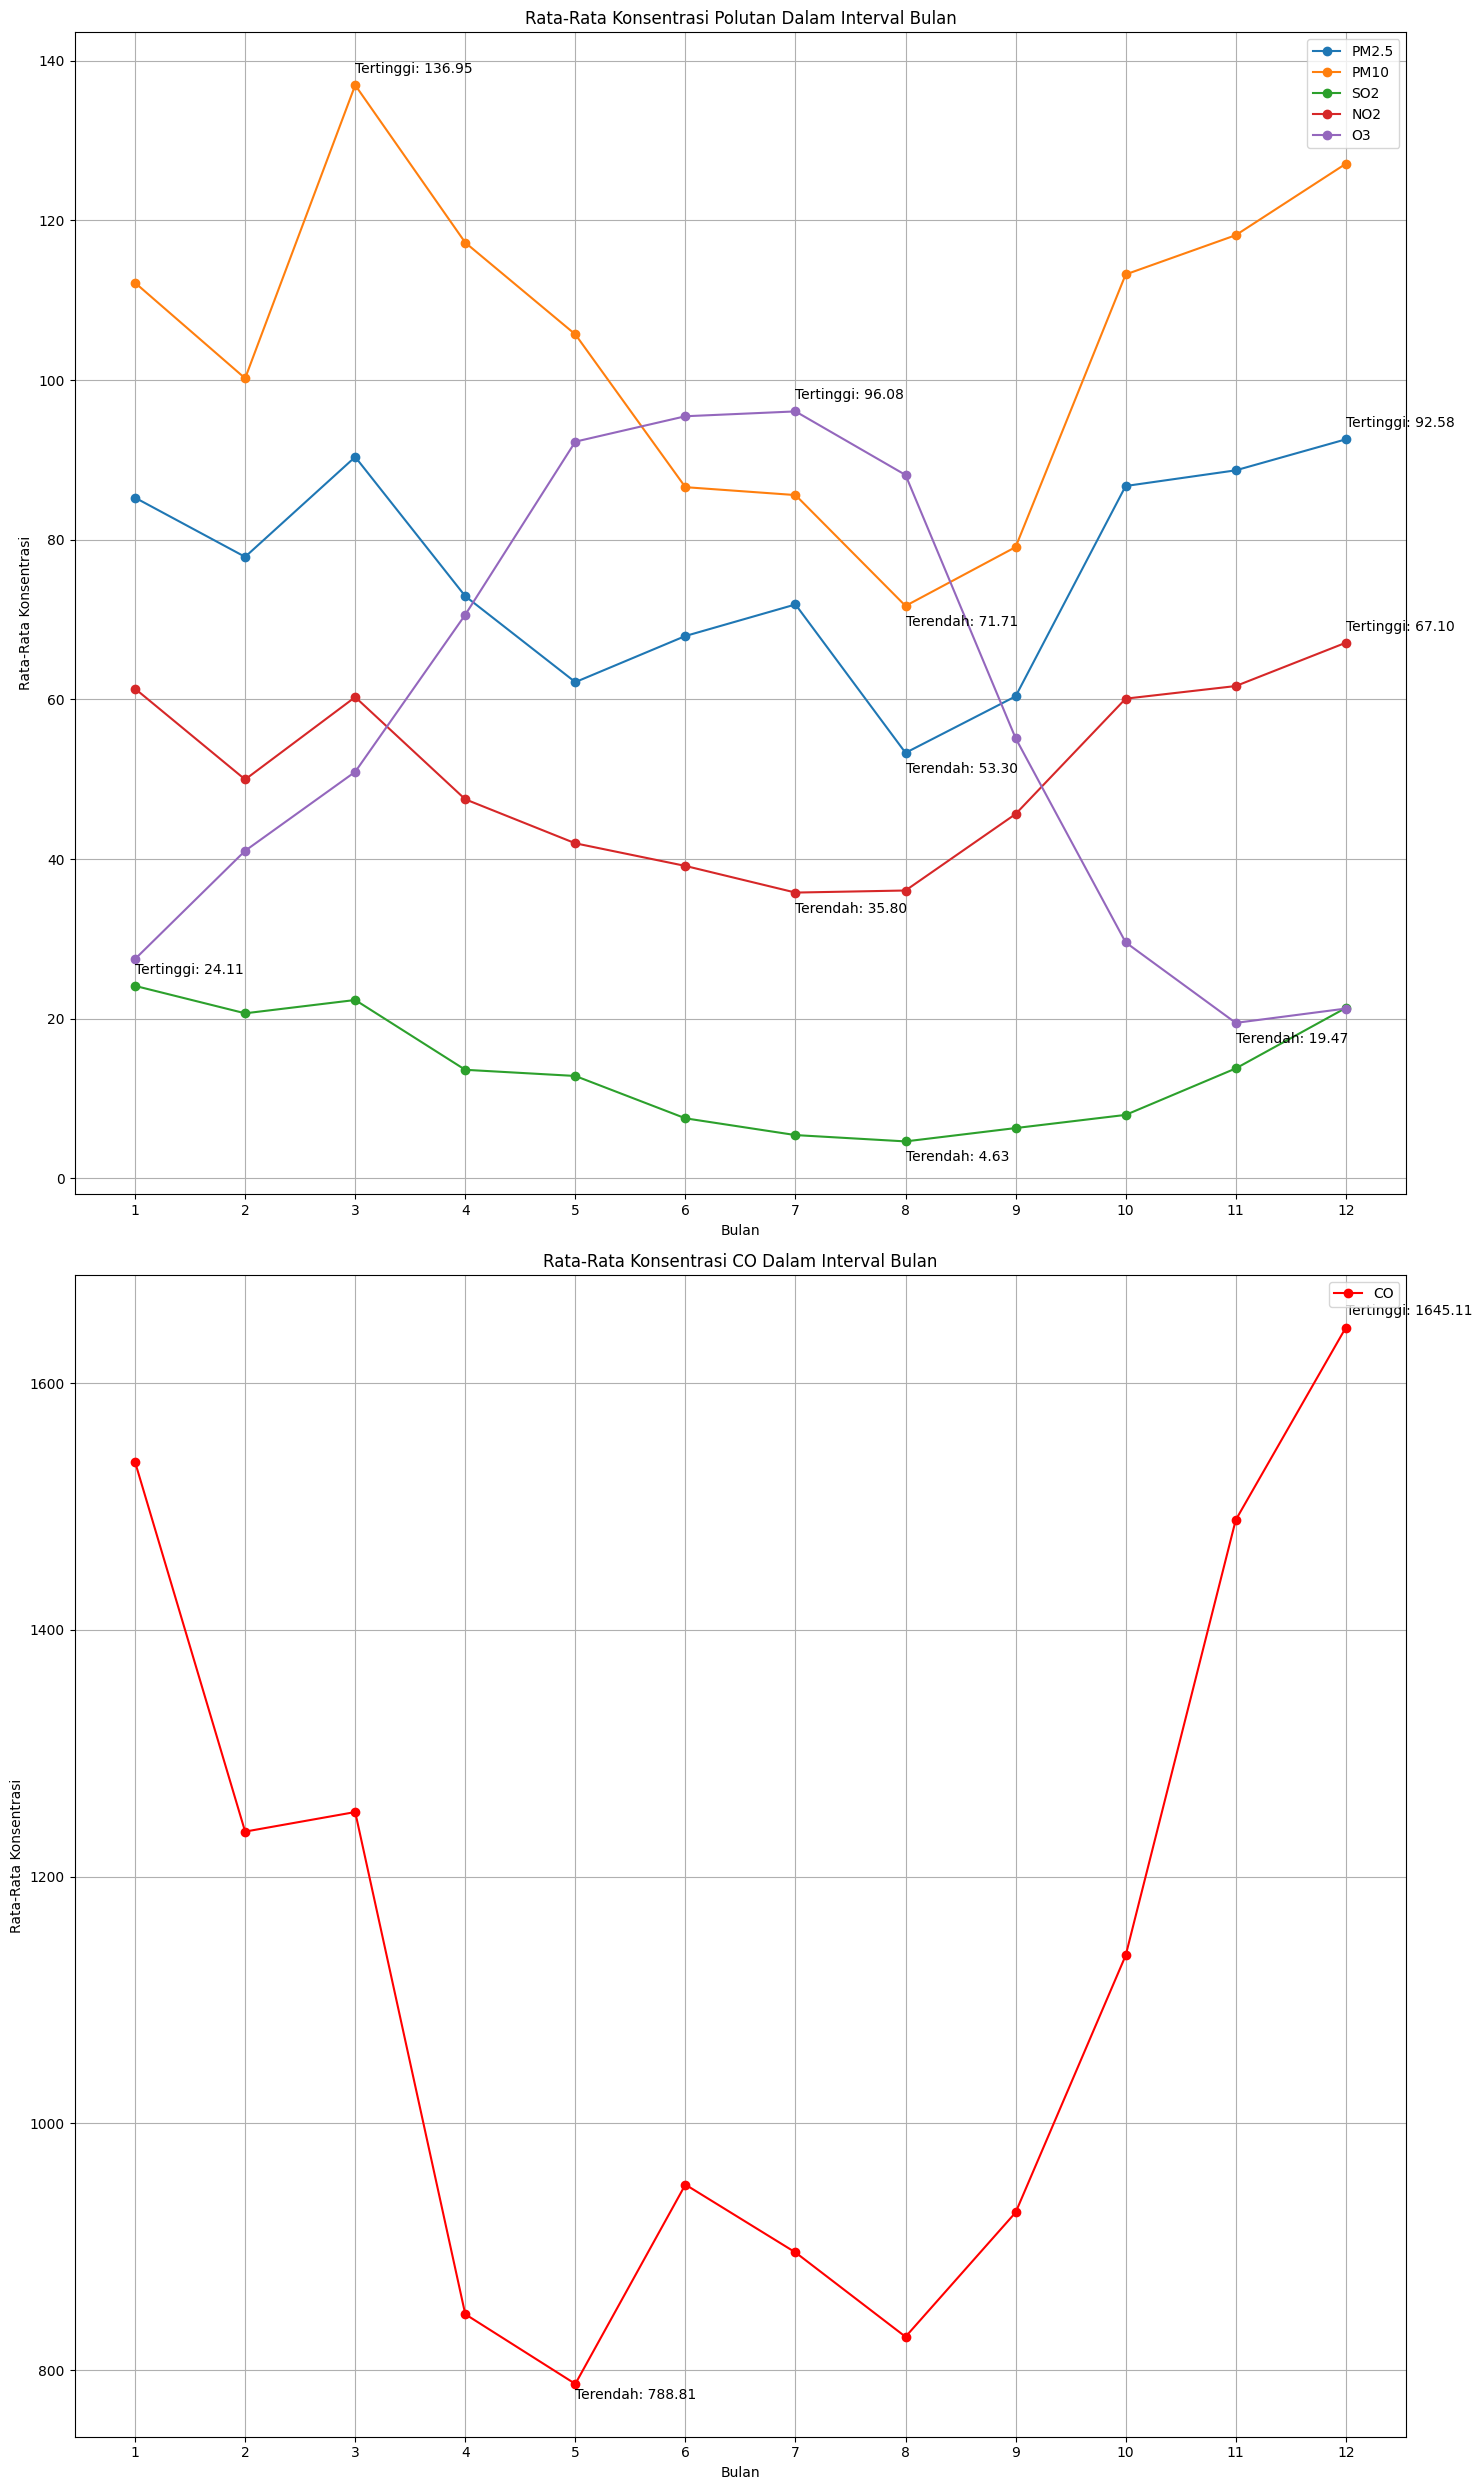

In [25]:
plt.figure(figsize=(15, 25))

# Plot polutan selain CO
plt.subplot(2, 1, 1)
for pollutant in monthly_avg_pollutants.columns:
    plt.plot(monthly_avg_pollutants.index, monthly_avg_pollutants[pollutant], marker='o', label=pollutant)
    
    # Mencari titik tertinggi dan terendah polutan, lalu masukkan pada plot
    peak_value = monthly_avg_pollutants[pollutant].max()
    lowest_value = monthly_avg_pollutants[pollutant].min()
    peak_month = monthly_avg_pollutants[pollutant].idxmax()
    lowest_month = monthly_avg_pollutants[pollutant].idxmin()
    plt.annotate(f'Tertinggi: {peak_value:.2f}', 
                 xy=(peak_month, peak_value), xytext=(peak_month, peak_value+1.5), fontsize=10)
    plt.annotate(f'Terendah: {lowest_value:.2f}', 
                 xy=(lowest_month, lowest_value), xytext=(lowest_month, lowest_value-2.5), fontsize=10)

# Menambahkan judul, label, jarak tick, legend, dan grid
plt.title('Rata-Rata Konsentrasi Polutan Dalam Interval Bulan')
plt.xlabel('Bulan')
plt.ylabel('Rata-Rata Konsentrasi')
plt.xticks(range(1, 13))  
plt.legend()
plt.grid(True)

# Plot polutan CO
plt.subplot(2, 1, 2)
plt.plot(monthly_avg_CO.index, monthly_avg_CO, marker='o', color='red', label='CO')

# Mencari titik tertinggi dan terendah CO, lalu masukkan pada plot
peak_value = monthly_avg_CO.max()
lowest_value = monthly_avg_CO.min()
peak_month = monthly_avg_CO.idxmax()
lowest_month = monthly_avg_CO.idxmin()
plt.annotate(f'Tertinggi: {peak_value:.2f}', 
             xy=(peak_month, peak_value), xytext=(peak_month, peak_value+10.5), fontsize=10)
plt.annotate(f'Terendah: {lowest_value:.2f}', 
             xy=(lowest_month, lowest_value), xytext=(lowest_month, lowest_value-12.5), fontsize=10)

# Menambahkan judul, label, jarak tick, legend, dan grid
plt.title('Rata-Rata Konsentrasi CO Dalam Interval Bulan')
plt.xlabel('Bulan')
plt.ylabel('Rata-Rata Konsentrasi')
plt.xticks(range(1, 13))  
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

### Pertanyaan 2: Pengelompokkan tingkat SO2 dan NO2 berdasarkan kondisi hujan di stasiun Changping

Pengelompokkan tingkat SO2 dan NO2 berdasarkan kondisi hujan di stasiun Changping<br><br>

Pada kasus ini saya ingin mencoba melihat apakah hujan dapat berpengaruh terhadap tingkat `SO2` dan `NO2`. Harapannya, akan muncul kelompok atau *clusters* dari data-data. Dikarenakan ada banyaknya data pada dataset, saya akan lebih spesifik meninjau data dari stasiun Changping. Selain itu, saya juga membatasi variabel yang mana `Rain` hanya akan bernilai YA atau TIDAK. Hal ini dikarenakan jika menggunakan value presitipasi hujan dari atribut tersebut, maka akan terlalu banyak variabel yang ditinjau.<br><br>

Berikut adalah steps yang akan dilakukan:
1. Membuat data terpisah dari stasiun Changping
2. Membuat `Rain_Status` yang menunjukkan apakah sedang hujan atau tidak saat pengambilan data
3. Menampilkan pada scatter plot, dengan harapan akan munculnya pengelompokkan

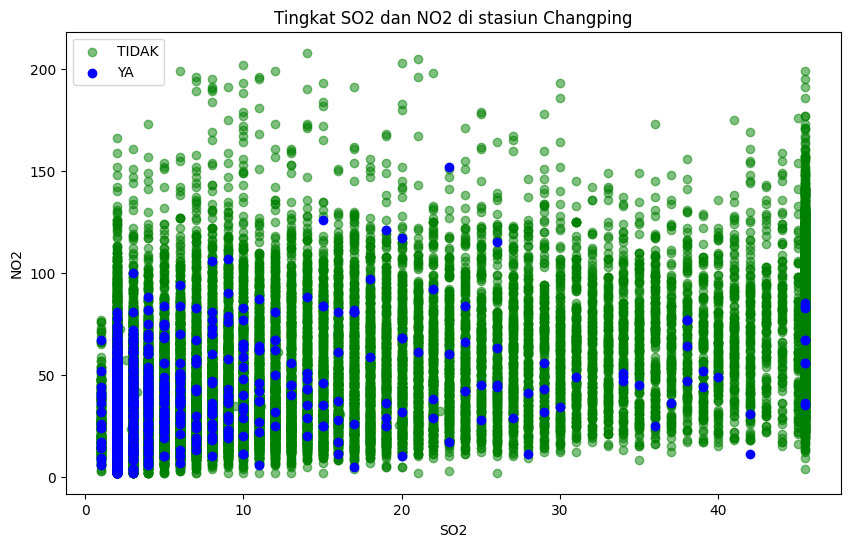

In [26]:
# Memisahkan data stasiun Changping dan membuat atribut Rain_Status
changping_data = df_air_quality[df_air_quality['station'] == 'Changping'].copy()
changping_data['Rain_Status'] = changping_data['RAIN'].apply(lambda x: 'YA' if x > 0 else 'TIDAK')
colors = {'YA': 'blue', 'TIDAK': 'green'}

# Plot scatter plot SO2 NO2 dan Rain_Status stasiun Changping
plt.figure(figsize=(10, 6))
for status, group in changping_data.groupby('Rain_Status'):
    # Karena banyaknya data tidak hujan, saya menurunkan transparansi tidak hujan agar data hujan terlihat
    # Hal ini sebenarnya bisa diterapkan undersampling, namun materi belum sampai
    alpha_val = 0.5 if status == 'TIDAK' else 1  
    plt.scatter(group['SO2'], group['NO2'], alpha=alpha_val, c=colors[status], label=status)

# Menambahkan judul, label, dan legend
plt.title('Tingkat SO2 dan NO2 di stasiun Changping')
plt.xlabel('SO2')
plt.ylabel('NO2')
plt.legend()
plt.show()

## Conclusion

### Pertanyaan 1
Berdasarkan visualisasi dari data yang telah dibuat di atas, diperoleh beberapa konklusi:
1. Baik perbulan maupun perjam, tingkat konsentrasi `SO2` adalah yang terendah dibandingkan polutan lainnya
2. Di sekitar jam siang, mulai dari sekitar jam 10, hampir seluruh polutan akan mengalami penurunan. Kecuali untuk `O3`. Hal ini menunjukkan adanya korelasi negatif antara `O3` dan polutan lainnya. 
3. `O3` memiliki perubahan yang paling signifikan, dengan beda value tertinggi dan terendah yaitu sekitar 77 satuan konsentrasi baik perjam maupun perbulan
4. Secara keseluruhan, udara memiliki tingkat polutan yang secara rata-rata paling rendah adalah pada term 3, atau sekitar bulan 7, 8, dan 9.
5. Polutan mendekati tengah malam dan juga mendekati akhir tahun akan meningkat.

Masih banyak lagi kesimpulan yang dapat diambil dari pengolahan di atas. Namun, beberapa poin di atas dapat berguna.

### Pertanyaan 2
Berdasarkan visualisasi dan pengolahan dari data yang telah dibuat di atas, diperoleh beberapa konklusi:
1. Pada saat hujan, konsentrasi `SO2` akan secara mayoritas berada di bawah 20 satuan.
2. Pada saat hujan, konsentrasi `NO2` akan secara mayoritas berada di bawah 100 satuan.
3. Tidak terbentuk *clustering* dengan sempurna, namun data sedang hujan secara mayoritas terdapat di suatu kelompok di kiri bawah visualisasi.
4. Untuk kedepannya, dapat dimasukkan pula variabel intensitas hujan agar makin terlihat pengelompokkannya.

Menurut saya itu adalah kesimpulan yang dapat diambil, penyempurnaan variabel yang digunakan bisa memperbaiki *clustering* yang terbentuk agar semakin terlihat pengelompokkannya.